Dataset Shape: (118000, 171)
Training samples: (94400, 170)
Testing samples: (23600, 170)

Training distribution after SMOTE:
class
1    47200
0    47200
Name: count, dtype: int64

Testing distribution (unchanged):
class
0    11800
1    11800
Name: count, dtype: int64

✅ Random Forest Accuracy: 99.57%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     11800
           1       0.99      1.00      1.00     11800

    accuracy                           1.00     23600
   macro avg       1.00      1.00      1.00     23600
weighted avg       1.00      1.00      1.00     23600

Confusion Matrix:
 [[11703    97]
 [    4 11796]]


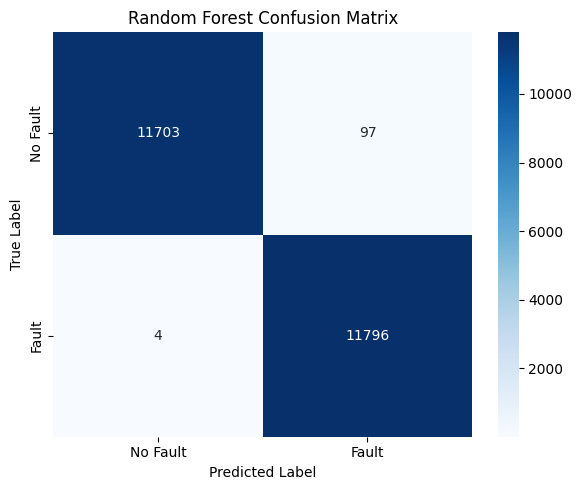

✅ Model saved at ../models/rf_model.pkl


In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
import joblib

import matplotlib.pyplot as plt
import seaborn as sns

# ====================================
# 1. Load PRE-SMOTE Data
# ====================================

df = pd.read_csv("../data/processed/processed_data.csv")

X = df.drop("class", axis=1)
y = df["class"]

print("Dataset Shape:", df.shape)

# ====================================
# 2. Train-Test Split (FIRST)
# ====================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)

# ====================================
# 3. Apply SMOTE ONLY on training data
# ====================================

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nTraining distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

print("\nTesting distribution (unchanged):")
print(y_test.value_counts())

# ====================================
# 4. Train Random Forest Model
# ====================================

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_smote, y_train_smote)

# ====================================
# 5. Model Evaluation
# ====================================

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Random Forest Accuracy: {accuracy * 100:.2f}%\n")

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# ====================================
# 6. Confusion Matrix (NUMERIC + IMAGE)
# ====================================

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Fault", "Fault"],
    yticklabels=["No Fault", "Fault"]
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()

# ====================================
# 7. Save Trained Model
# ====================================

import os


# Ensure models directory exists
os.makedirs("../models", exist_ok=True)

# Save model explicitly
joblib.dump(rf_model, "../models/rf_model.pkl")

print("✅ Model saved at ../models/rf_model.pkl")
